### 공분산

공분산과 상관성 분석    
    - 변수 간 관계 분석의 필요성

        - 변수 간 관계를 파악하는 이유 
            - 타깃 변수(Y)와 입력 변수(X) 간의 관계 분석    
            - 입력 변수 간의 관계 파악  
            - 다중공선성 문제 방지  
            - 데이터의 특성을 깊이 이해하며 최적의 분석 모델 구축       

공분산은 두 변수(X,Y)의 변동이 얼마나 닮았는지를 측정   
공분산이 양수면 양의 상관관계, 음수면 음의 상관관계, 0이면 관계 없음

### 상관계수

공분산은 두 변수 간의 관계를 측정하지만, 단위의 영향을 받는다.    
따라서 공분산을 각 변수의 표준편차로 나눈 정규화된 값, 상관계수를 사용한다.   

특징    
공분산을 표준화하여 -1에서 1사이의 값으로 변환    
값이 크면 변수 간의 관계가 강함을 의미    

### 실습코드

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import classification_report
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('D:/김동영/11_Github/mygit/데이터사이언스수업/4주차/Dataset/wine-quality.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


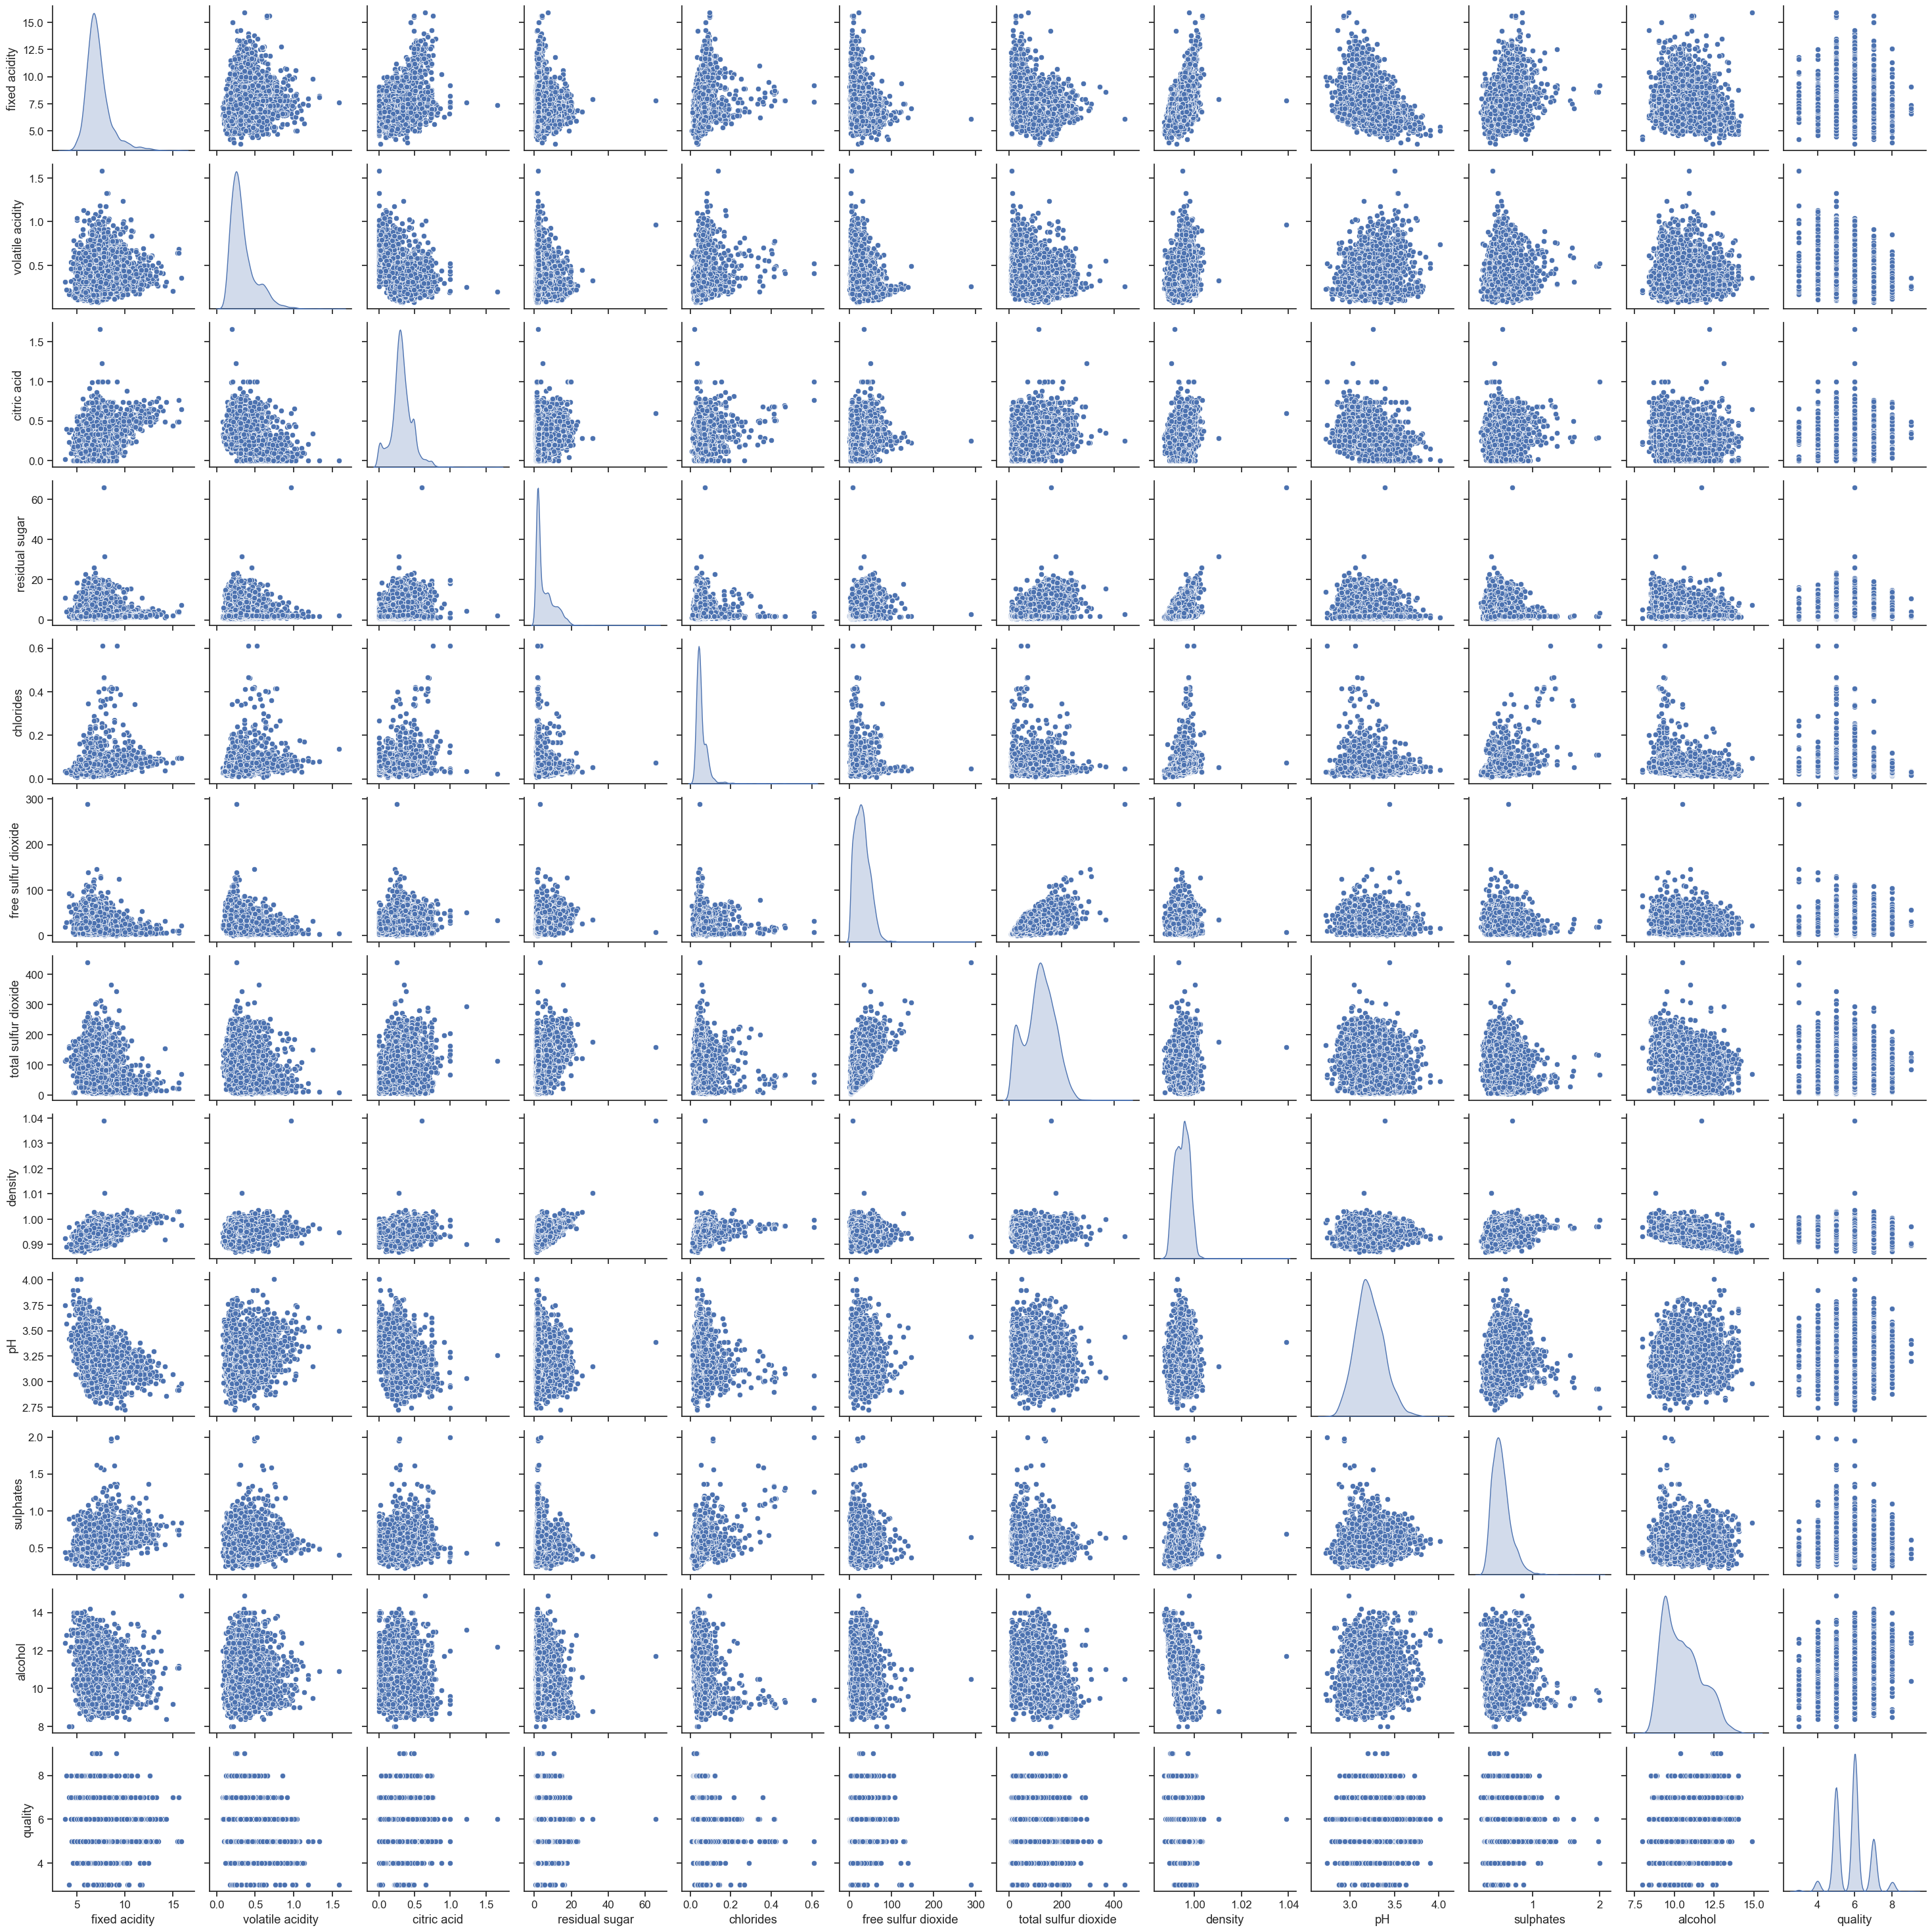

In [6]:
# 산점도 행렬 시각화
sns.set(font_scale=1.1) ## 폰트 크기 설정
sns.set_style('ticks') ## 축 눈금 설정
sns.pairplot(df,
             diag_kind='kde' # 상관계수가 1이면 분포로 표시
            )
plt.show()

In [ ]:
# 공분산 확인, Covariance
# 각 컬럼의 수치형 변수에 대해서만 공분산 확인 가능
numeric_columns = df.select_dtypes(include=['number']) # 수치형 변수만 추출
numeric_columns.cov() # 공분산 행렬 확인

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.681560,0.047012,0.060971,-0.693045,0.013564,-6.524162,-24.162531,0.001786,-0.052524,0.057990,-0.147911,-0.087224
volatile acidity,0.047012,0.027109,-0.009043,-0.154122,0.002177,-1.032411,-3.861743,0.000134,0.006898,0.005526,-0.007509,-0.038246
citric acid,0.060971,-0.009043,0.021102,0.098498,0.000200,0.344101,1.602662,0.000042,-0.007675,0.001245,-0.001808,0.010874
residual sugar,-0.693045,-0.154122,0.098498,22.639751,-0.021493,34.060547,133.334227,0.007884,-0.204174,-0.131562,-2.041388,-0.153011
chlorides,0.013564,0.002177,0.000200,-0.021493,0.001228,-0.121269,-0.553673,0.000038,0.000252,0.002061,-0.010735,-0.006145
free sulfur dioxide,-6.524162,-1.032411,0.344101,34.060547,-0.121269,315.041192,723.261972,0.001369,-0.414329,-0.497973,-3.807165,0.859664
total sulfur dioxide,-24.162531,-3.861743,1.602662,133.334227,-0.553673,723.261972,3194.720039,0.005491,-2.159577,-2.316258,-17.914646,-2.042704
density,0.001786,0.000134,0.000042,0.007884,0.000038,0.001369,0.005491,0.000009,0.000006,0.000116,-0.002456,-0.000801
pH,-0.052524,0.006898,-0.007675,-0.204174,0.000252,-0.414329,-2.159577,0.000006,0.025840,0.004575,0.023203,0.002719
sulphates,0.057990,0.005526,0.001245,-0.131562,0.002061,-0.497973,-2.316258,0.000116,0.004575,0.022146,-0.000579,0.005032


In [11]:
# 피어슨 상관계수 확인, Pearson Correlation Coefficient
# 피어슨 상관계수는 -1 ~ 1 사이의 값을 가짐
numeric_columns.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366
sulphates,0.300380,0.225476,0.057613,-0.185745,0.395332,-0.188489,-0.275381,0.259454,0.191248,1.000000,-0.003261,0.038729


<Axes: >

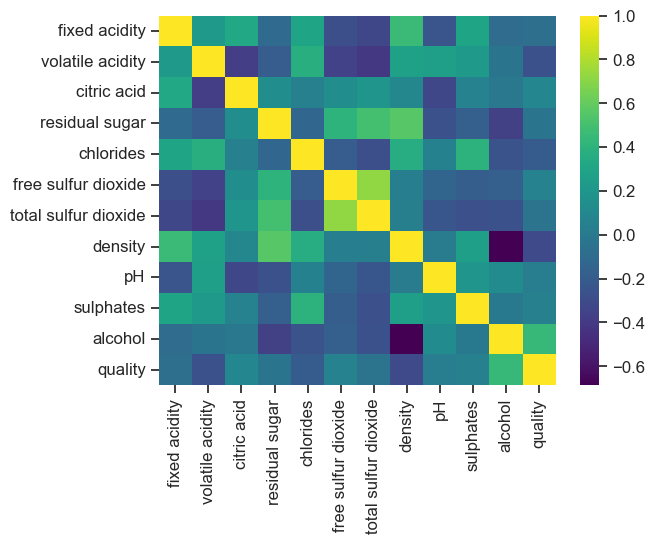

In [12]:
# 히트맵 시각화
sns.heatmap(numeric_columns.corr(), cmap='viridis')

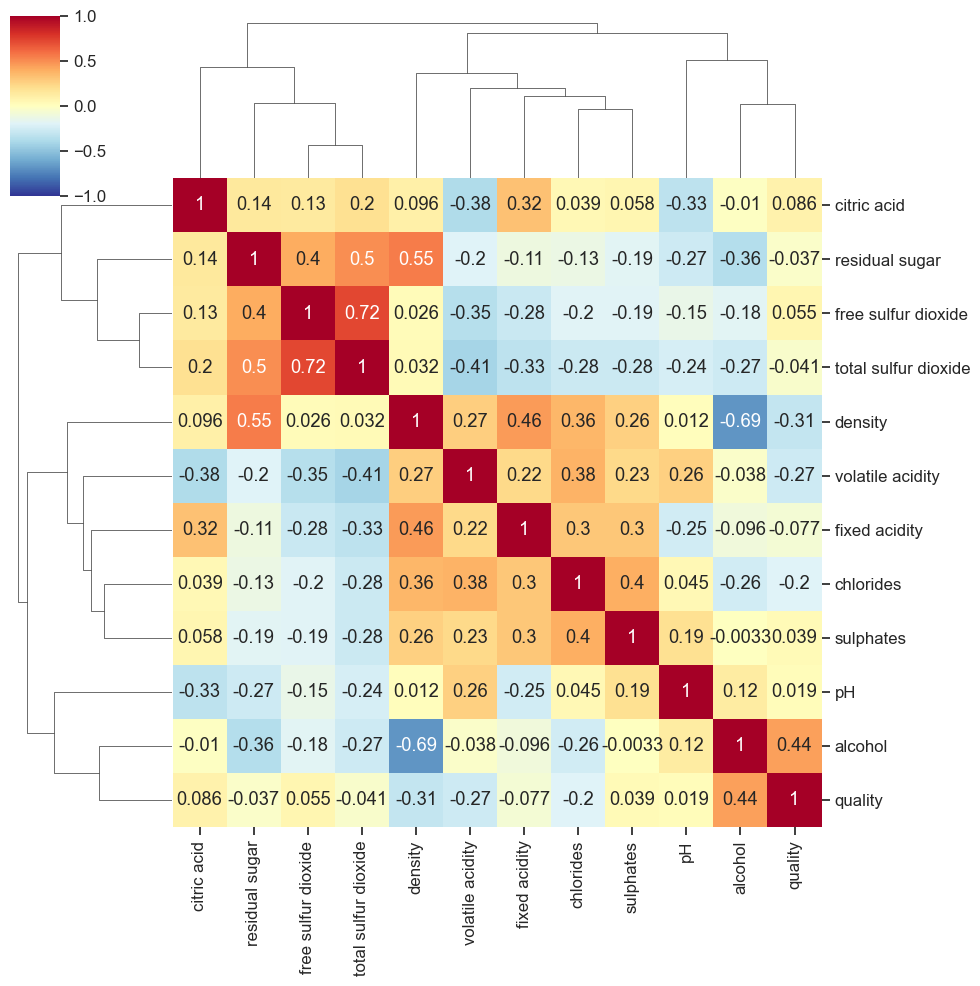

In [13]:
# clustermap 히트맵 시각화
sns.clustermap(numeric_columns.corr(), 
               annot = True,      
               cmap = 'RdYlBu_r',  
               vmin = -1, vmax = 1,
              )

Text(0.5, 1.0, 'Wine Quality Correlation')

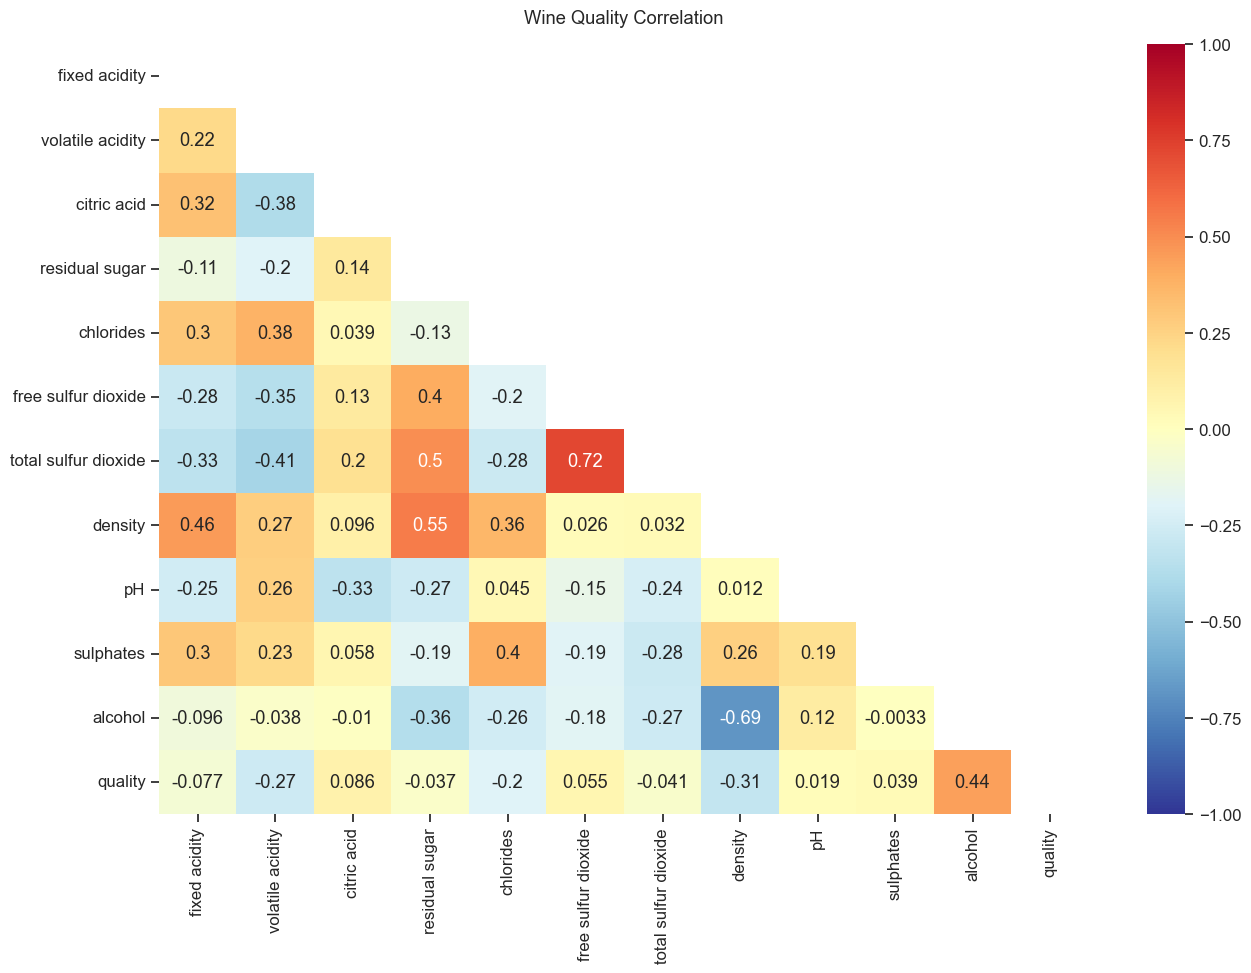

In [ ]:
# 중복 제거 히트맵 시각화

# 매트릭스의 우측 상단을 모두 True인 1로, 하단을 False인 0으로 변환.
np.triu(np.ones_like(numeric_columns.corr()))

# True/False mask 배열로 변환.
mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))

#  히트맵 그래프 생성
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(numeric_columns.corr(), 
            mask=mask, 
            vmin=-1, 
            vmax = 1, 
            annot=True, 
            cmap="RdYlBu_r", 
            cbar = True)
ax.set_title('Wine Quality Correlation', pad = 15)